<a href="https://colab.research.google.com/github/Human77777/Group45/blob/main/Data_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Overview**
Introduction of the dataset and display basic statistics for overall idea of the data




In [ ]:
import pandas as pd

# Load data
data = pd.read_csv('/content/vgsales/vgsales.csv')

# Displaying the first few rows of the data.
display(data.head())
# Data Overview
print("Dataset Basic Information:")
data.info()


# Display basic statistical summary
print("\nBasic Statistical Overview:")
display(data.describe())

# Check and handle missing values
print("\nMissing Data Check:")
display(data.isnull().sum())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Dataset Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Basic Statistical Overview:


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000



Missing Data Check:


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# **Data Analysis and Visualization**


# Hypothesis 1: Action games are the most popular genre globally

<ipython-input-5-988a1d720b4f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')


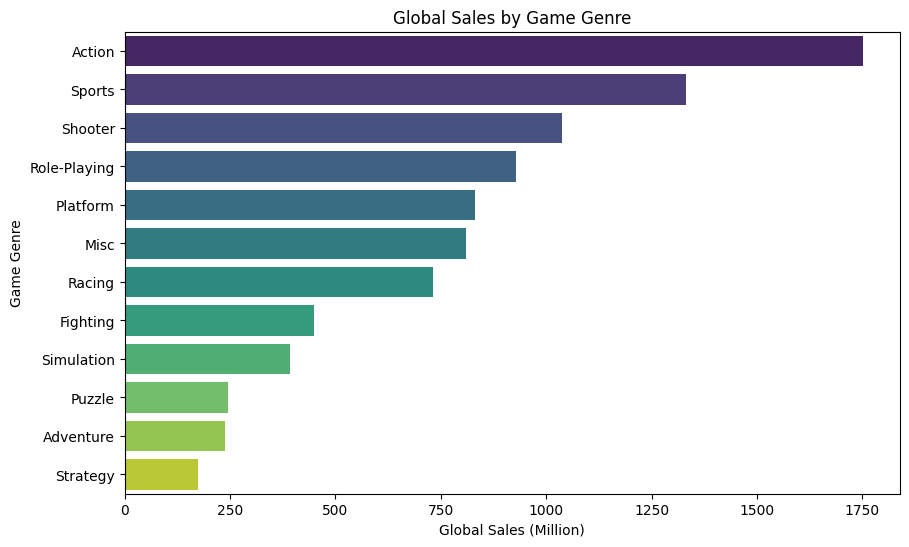

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by genre and global sales
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='viridis')
plt.title('Global Sales by Game Genre')
plt.xlabel('Global Sales (Million)')
plt.ylabel('Game Genre')
plt.show()


# Hypothesis 2: North America contributes the most to global video game sales

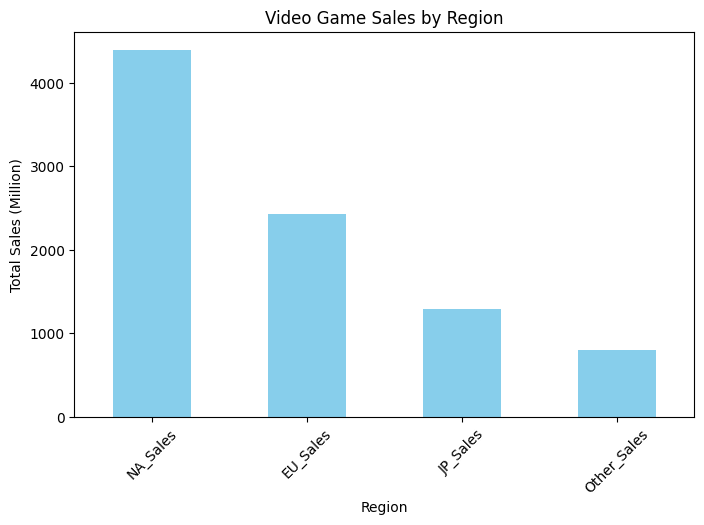

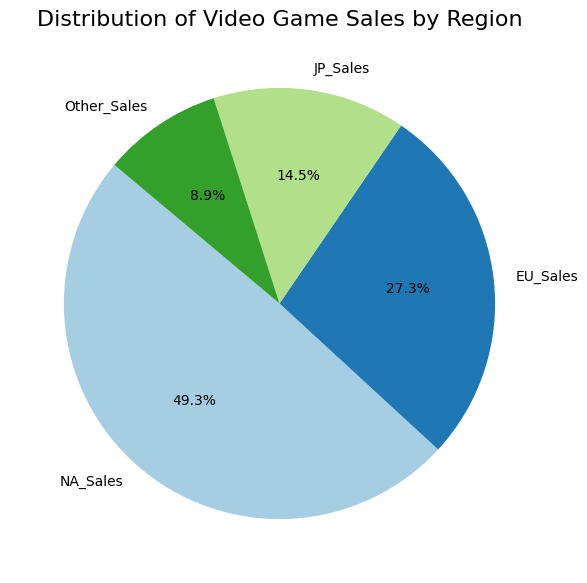

NA_Sales       4392.95
EU_Sales       2434.13
JP_Sales       1291.02
Other_Sales     797.75
dtype: float64

In [ ]:
# Regional sales comparison
region_sales = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Visualization
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='skyblue')
plt.title('Video Game Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (Million)')
plt.xticks(rotation=45)
plt.show()



# Create a pie chart for regional sales contribution
plt.figure(figsize=(10, 7))
region_sales_plot = plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired"))
plt.title('Distribution of Video Game Sales by Region', fontsize=16)

# Show plot
plt.show()

# Return the regional sales
region_sales


The pie chart and bar chart delineates the distribution of video game sales by region. We can observe that:

*   **North America (NA_Sales)** dominates the market with a substantial 49.4% share of the total sales, equating to approximately 4393 million units.
*   **Europe (EU_Sales)** follows with a significant 27.4%, corresponding to around 2434 million units.
*   **Japan (JP_Sales)** holds a 14.5% market share with sales close to 1291 million units.
*   Sales from **Other regions** constitute 9.0% of the market.

This distribution substantiates Hypothesis 2, affirming that North America is the predominant contributor to global video game sales, nearly doubling the sales of the next closest region, Europe

# Hypothesis 3: Nintendo is the most successful publisher in terms of global sales

<ipython-input-9-7f6de1abde32>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='coolwarm')


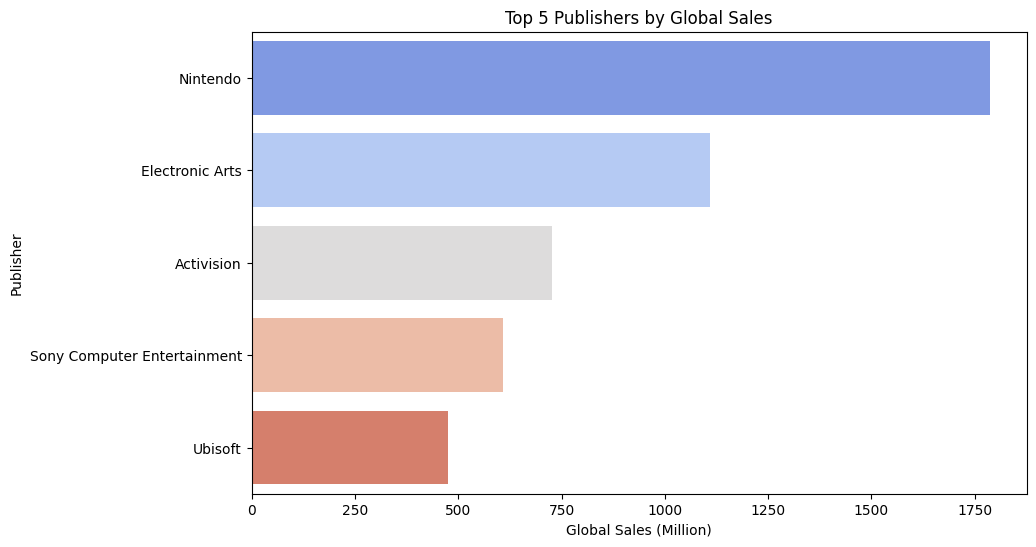

In [ ]:
# Total sales by publisher
publisher_sales = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(5)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_sales.values, y=publisher_sales.index, palette='coolwarm')
plt.title('Top 5 Publishers by Global Sales')
plt.xlabel('Global Sales (Million)')
plt.ylabel('Publisher')
plt.show()



# Hypothesis 4: Total Sales for Each Platform in Each Region
This hypothesis posits that certain gaming platforms perform better in specific regions, reflecting regional preferences or market penetration. For instance, it's conceivable that platforms like PlayStation and Xbox might dominate in North America and Europe due to their widespread popularity, while Nintendo platforms could have higher sales in Japan

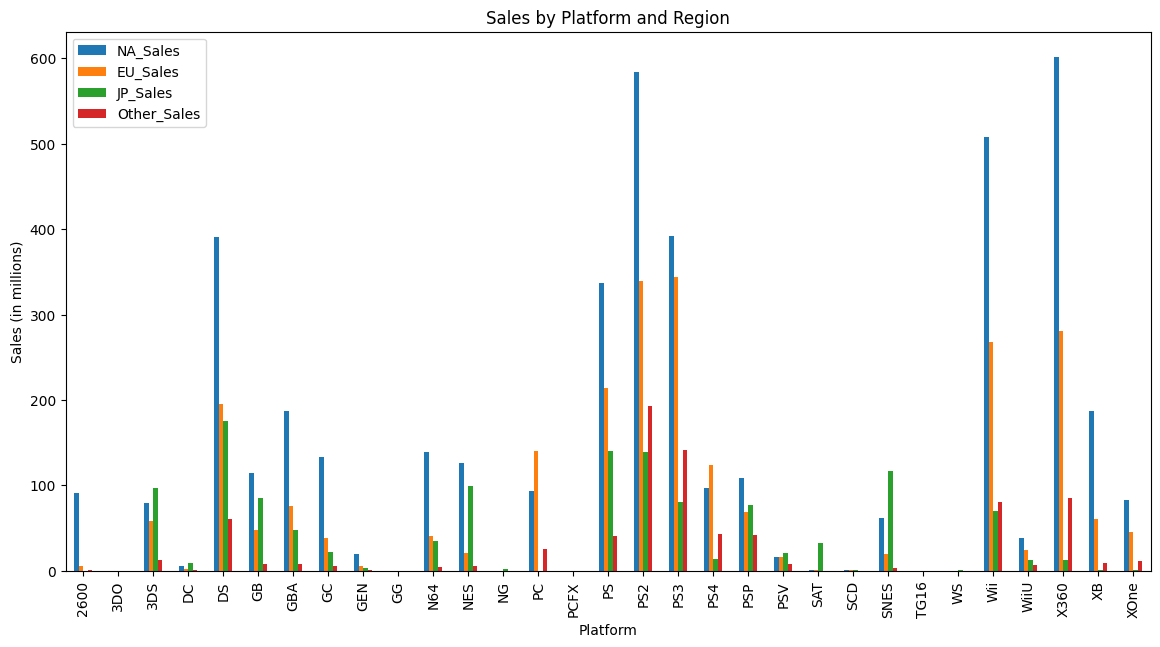

In [ ]:
# Total sales for each platform in each region
platform_region_sales = data.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting
platform_region_sales.plot(kind='bar', figsize=(14, 7))
plt.title('Sales by Platform and Region')
plt.xlabel('Platform')
plt.ylabel('Sales (in millions)')
plt.show()


# Hypothesis 5: Total Sales of Each Game Type in Each Region
This hypothesis explores the idea that different game genres have varying levels of popularity across different regions. For example, action games might be more popular in North America and Europe, while role-playing games could see higher sales in Japan.

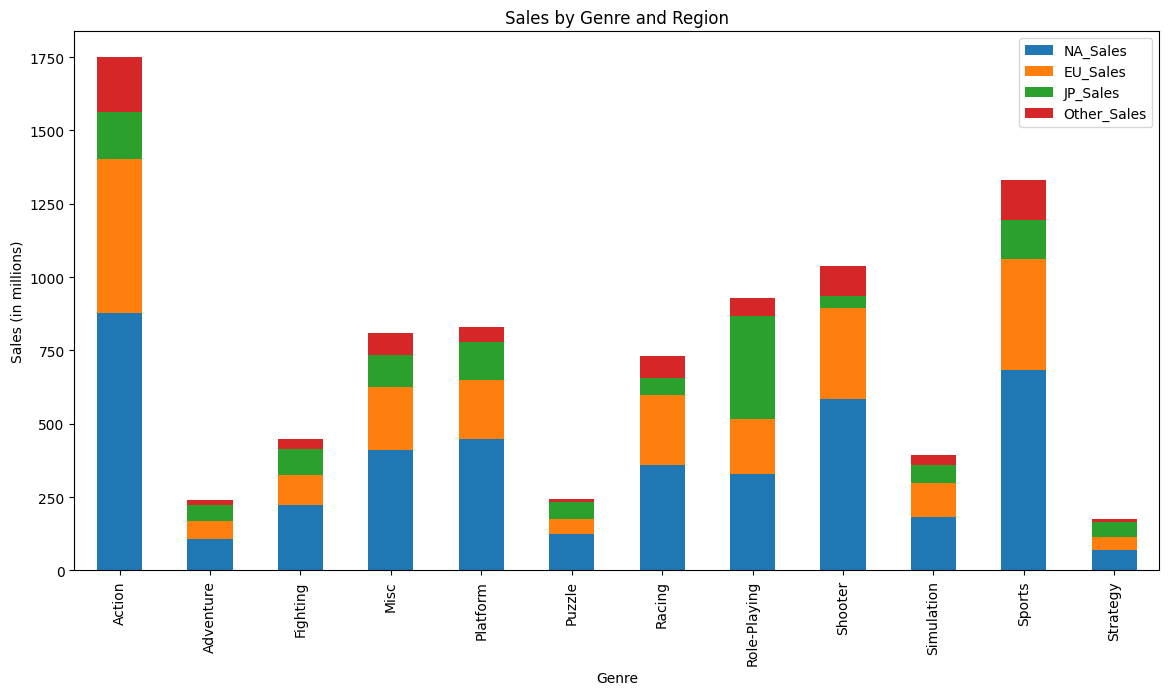

In [ ]:
# Total sales of each game type in each region
genre_region_sales = data.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Plotting
genre_region_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Sales by Genre and Region')
plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.show()


# *Hypothesis 6: Global Sales Distribution by Platform and Genre*
This hypothesis suggests that the distribution of game sales, when broken down by both platform and genre, will reveal specific combinations of platform and genre that are particularly successful. The heatmap visualization will provide a clear visual representation of these trends, showing which combinations are most lucrative.

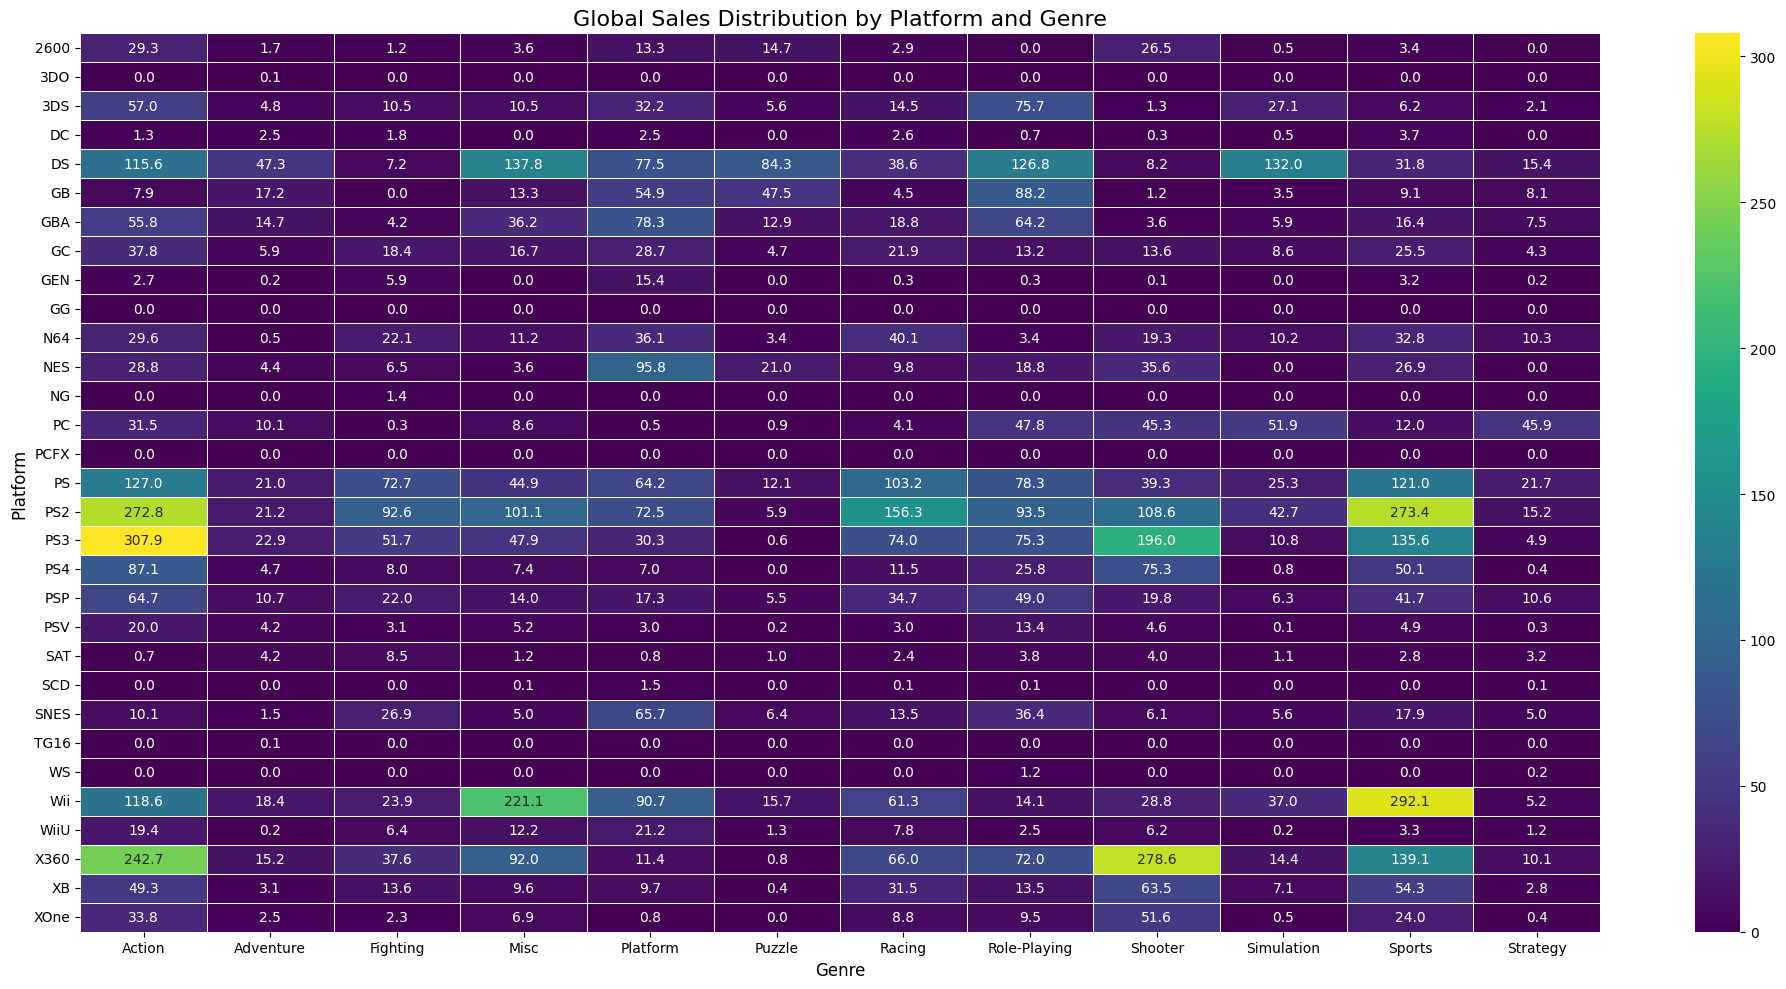

In [ ]:
sales_pivot = data.pivot_table(index='Platform', columns='Genre', values='Global_Sales', aggfunc='sum', fill_value=0)

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(sales_pivot, annot=True, fmt=".1f", cmap='viridis', linewidths=.5)
plt.title('Global Sales Distribution by Platform and Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.tight_layout()
plt.show()


From the heat map we see that:



*   The PlayStation 2 (PS2) dominates in Action and Sports, indicating a strong market preference on this console for those genres.
*   Nintendo DS excels in the Miscellaneous category, suggesting a successful niche in diverse and non-traditional game types.
*   PlayStation 3 (PS3) shows significant sales in Action and Shooter genres, reinforcing its appeal to enthusiasts of intense, adrenaline-driven gameplay.
*   Xbox 360 is prominent in the Shooter genre, reflecting its popularity among fans of first-person and third-person shooter games.
*   The Wii's Sports genre success is likely linked to its innovative motion-controlled gameplay, resonating widely with a casual gaming audience.









# Hypothesis 7: Video game preferences have shifted over time.

<Figure size 1500x800 with 0 Axes>

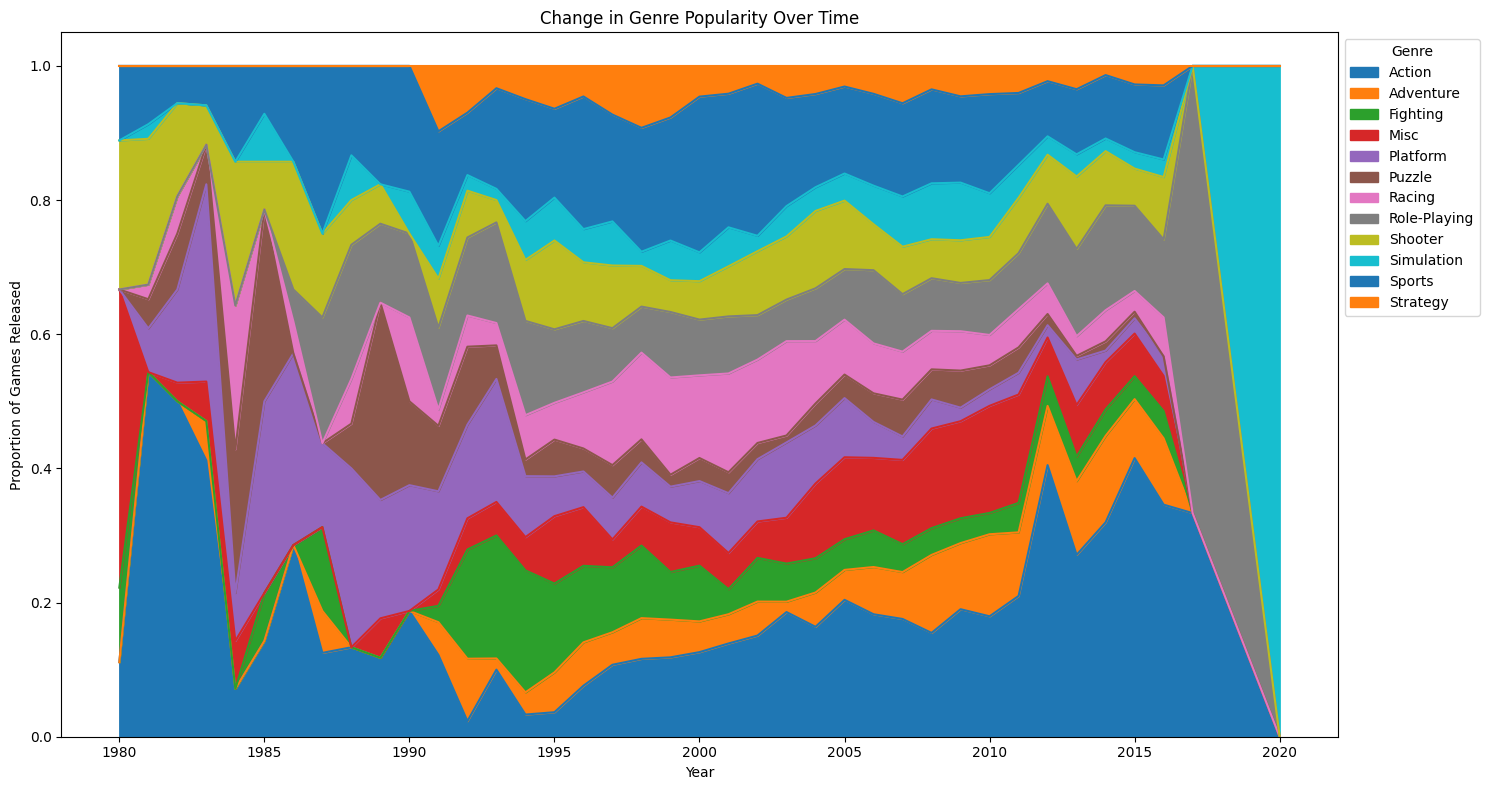

In [ ]:
# Calculate the proportion of each genre per year.
genre_yearly = data.groupby(['Year', 'Genre']).size().unstack(fill_value=0)
genre_proportions = genre_yearly.div(genre_yearly.sum(axis=1), axis=0)

# Plotting the change in genre proportions over the years
plt.figure(figsize=(15, 8))
genre_proportions.plot(kind='area', stacked=True, figsize=(15, 8))
plt.title('Change in Genre Popularity Over Time')
plt.xlabel('Year')
plt.ylabel('Proportion of Games Released')
plt.legend(title='Genre', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Hypothesis 8: There are platform lifecycles that can be observed through their sales over time.

<Figure size 1500x800 with 0 Axes>

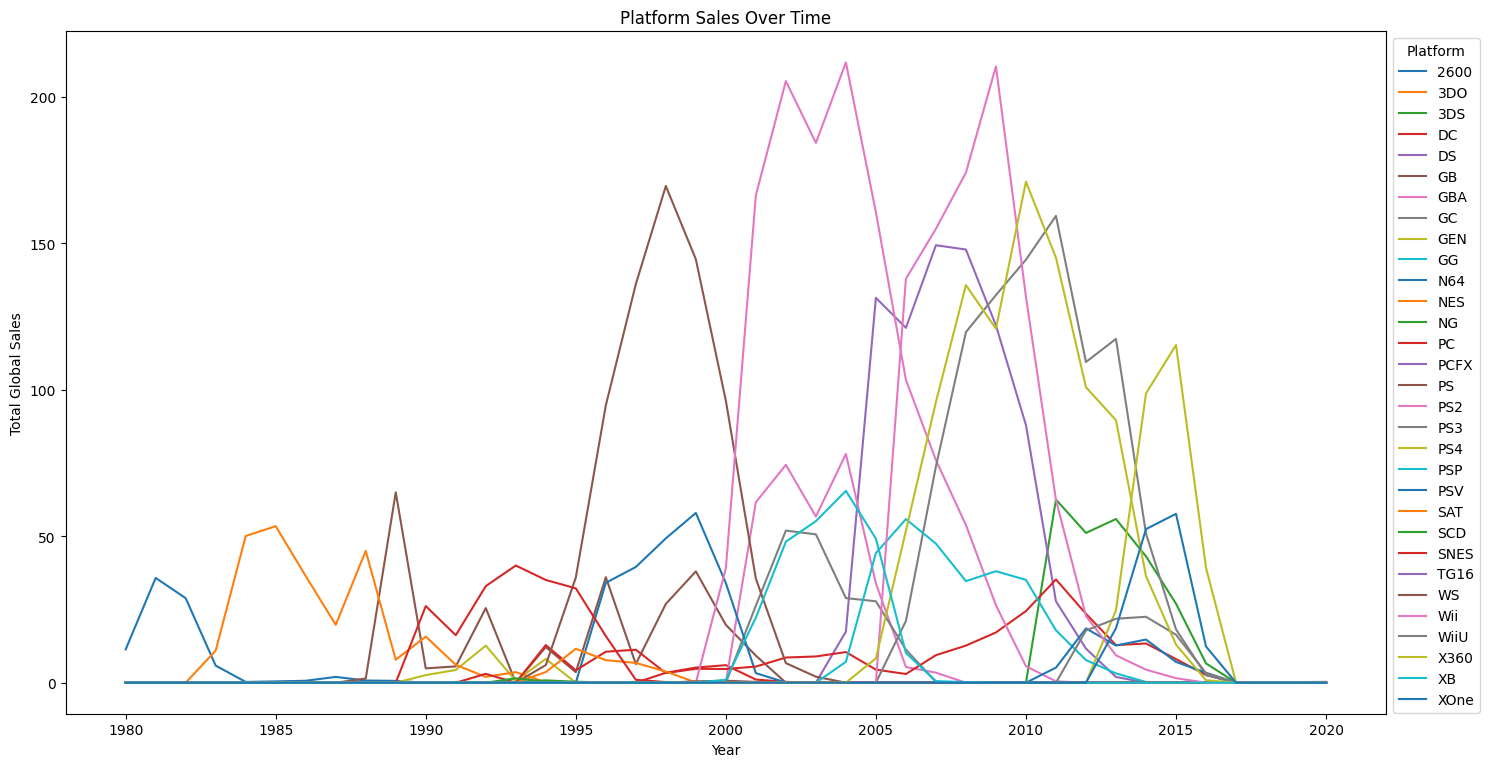

In [ ]:
# Sum the total sales for platforms across different years.
platform_sales_over_time = data.groupby(['Year', 'Platform']).sum()['Global_Sales'].unstack(fill_value=0)

# Plotting the total sales for platforms across different years
plt.figure(figsize=(15, 8))
platform_sales_over_time.plot(kind='line', figsize=(15, 8))
plt.title('Platform Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.legend(title='Platform', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Hypothesis 9: Regional preferences for video game platforms have remained consistent over time.

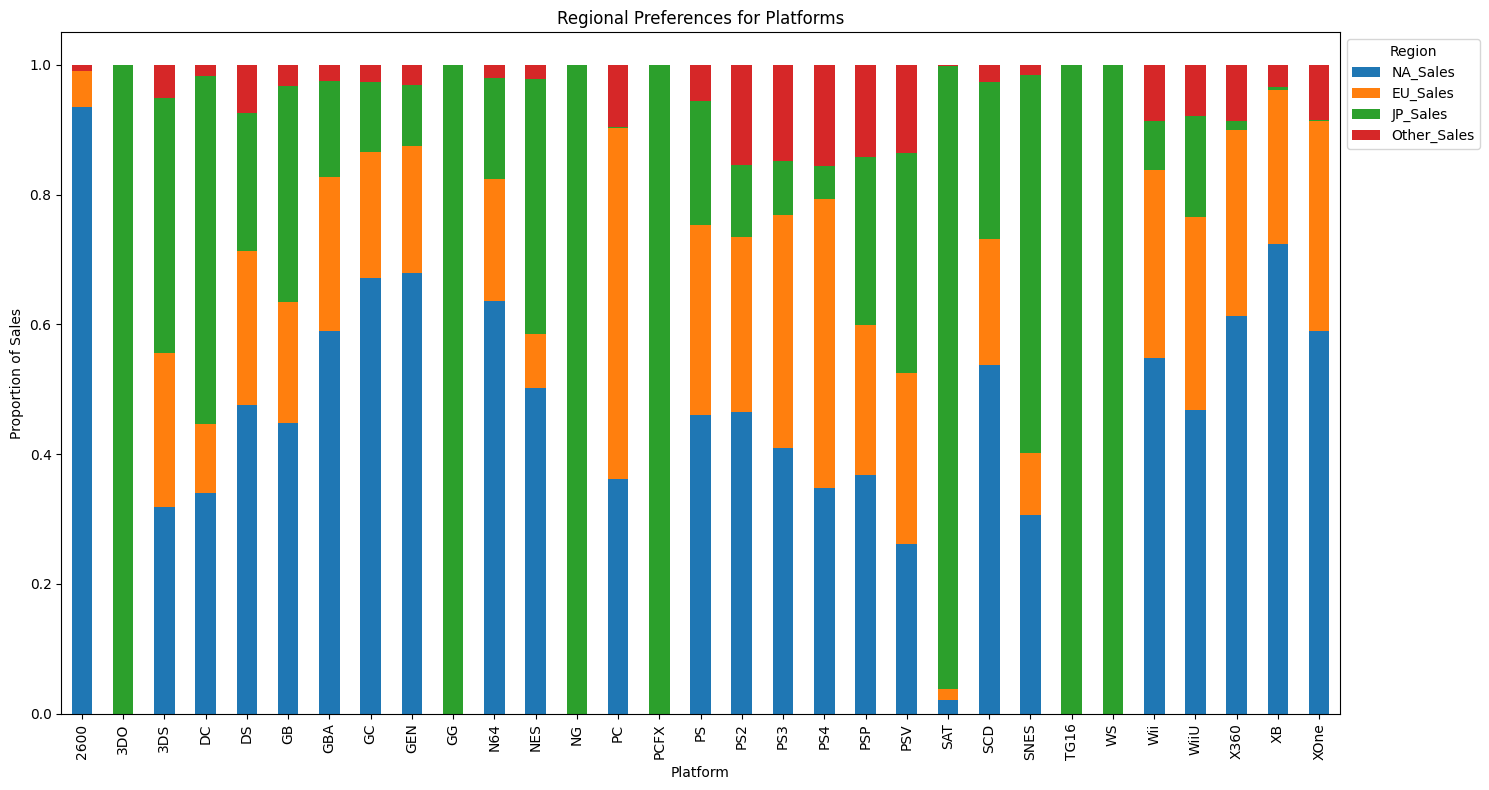

In [ ]:
# Correcting the code to use a list for selecting multiple columns
platform_region_sales = data.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
platform_region_proportions = platform_region_sales.div(platform_region_sales.sum(axis=1), axis=0)

# Plotting the regional sales distribution of platforms
platform_region_proportions.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Regional Preferences for Platforms')
plt.xlabel('Platform')
plt.ylabel('Proportion of Sales')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


Graph Insights:
*   Each bar in the chart represents a different video game platform.
*   The segments within each bar show the proportion of total sales attributed to North America (NA), Europe (EU), Japan (JP), and Other regions.
*   Platforms with a predominant color indicate a regional preference. For instance, a platform with a predominant green segment indicates a higher proportion of sales in Japan.
*   Comparing the segments across platforms can give insights into which platforms are more popular in certain regions.

This graph is particularly useful for publishers and developers to understand which platforms are favored in specific markets, aiding in strategic decisions regarding game development and marketing. The data suggest that certain platforms have a strong regional preference, while others may have a more balanced global presence.




# Hypothesis 10: The relationship between U.S. economic volatility and North American video game sales
In the hypothesis we cited US Economic Data from the kaggle website to go and analyze North American game sales and the US economic curve.

The four charts presented visualize the relationship between various economic indicators for the United States and the sales of video games in the North American market over several decades, specifically from around the 1980s to the early 2020s. Each chart compares a different economic factor with video game sales, and together they offer a comprehensive view of how the gaming industry has performed in the context of the broader US economy.


Reference from https://www.kaggle.com/datasets/xkevnx/us-economic-data

In [ ]:
# Load Data
economic_data = pd.read_csv('/content/vgsales/fredmeta.csv')
# Convert the 'Year' column in video game sales data to integer for consistency
data['Year'] = data['Year'].dropna().astype(int)

# Aggregate video game sales by year for the US market
us_vg_sales_by_year = data.groupby('Year')['NA_Sales'].sum().reset_index()

# Convert the date in economic data to datetime format and extract the year
economic_data['date'] = pd.to_datetime(economic_data['date'])
economic_data['Year'] = economic_data['date'].dt.year

# Aggregate economic indicators by year, for simplicity, we'll just use GDP as an example
# Note: GDP data is usually quarterly, but we will use the yearly average for comparison
us_economic_gdp_by_year = economic_data.groupby('Year')['gdp'].mean().reset_index()

# Merging the two datasets on the year column
combined_data = pd.merge(us_vg_sales_by_year, us_economic_gdp_by_year, on='Year', how='inner')

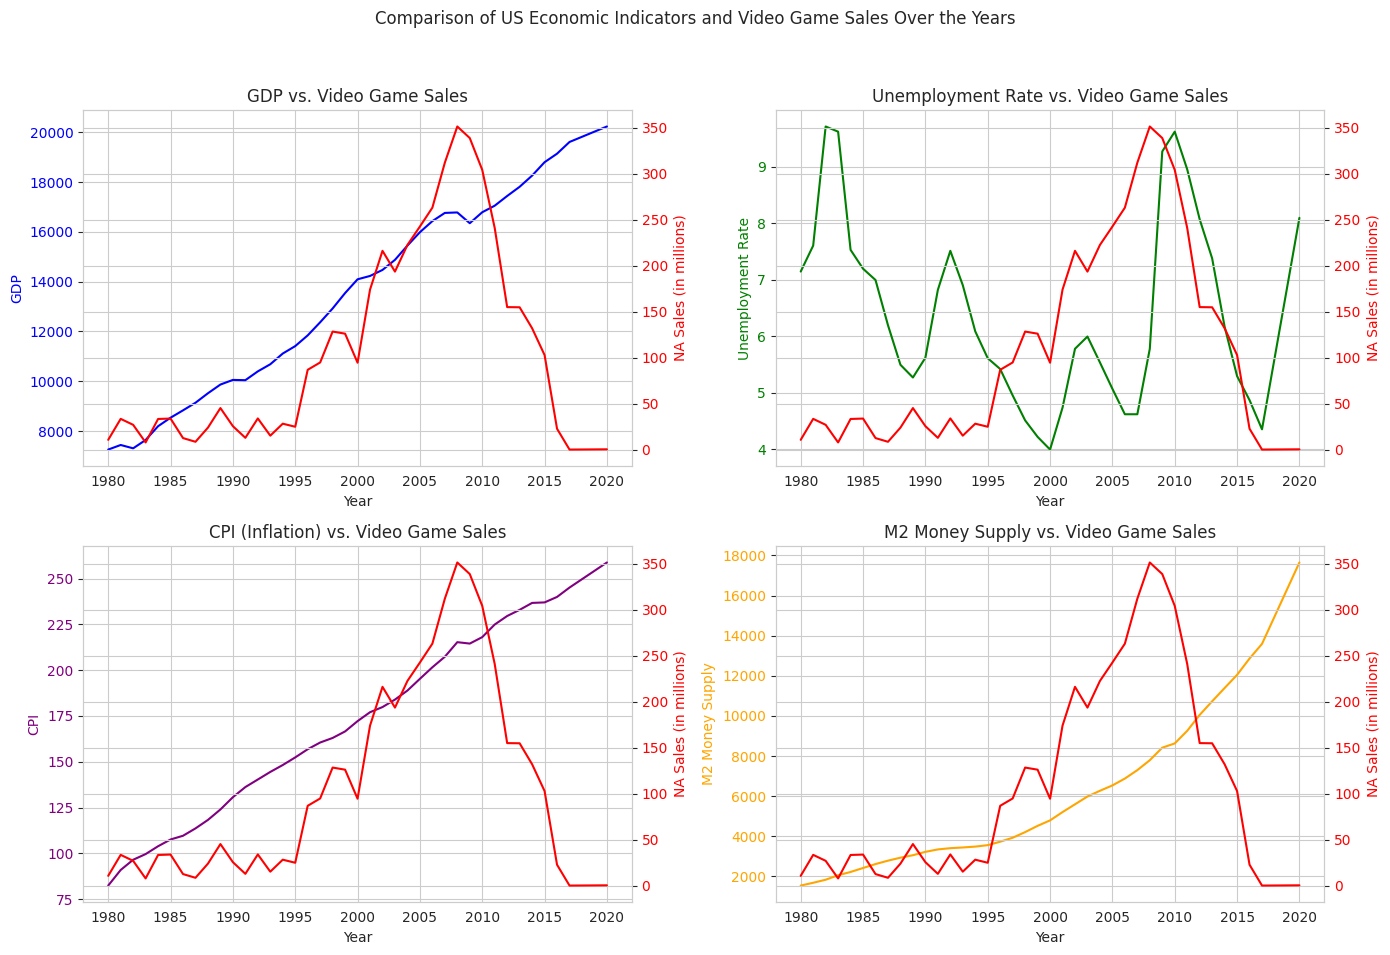

In [ ]:
# Clean and prepare the video game sales data
data.dropna(subset=['Year'], inplace=True)
data['Year'] = data['Year'].astype(int)
us_vg_sales_by_year = data.groupby('Year')['NA_Sales'].sum().reset_index()

# Prepare the economic data
economic_data['date'] = pd.to_datetime(economic_data['date'])
economic_data['Year'] = economic_data['date'].dt.year
us_economic_by_year = economic_data.groupby('Year').agg({
    'gdp': 'mean',  # Average GDP per year
    'unemployment': 'mean',  # Average unemployment rate per year
    'cpi': 'mean',  # Average CPI per year
    'm2': 'mean'  # Average M2 money supply per year
}).reset_index()

# Merge the datasets based on 'Year'
combined_data = pd.merge(us_vg_sales_by_year, us_economic_by_year, on='Year', how='inner')

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot GDP vs. Video Game Sales
axs[0, 0].plot(combined_data['Year'], combined_data['gdp'], label='GDP (in billions)', color='blue')
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('GDP', color='blue')
axs[0, 0].tick_params(axis='y', labelcolor='blue')
ax2 = axs[0, 0].twinx()
ax2.plot(combined_data['Year'], combined_data['NA_Sales'], label='Video Game Sales', color='red')
ax2.set_ylabel('NA Sales (in millions)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
axs[0, 0].set_title('GDP vs. Video Game Sales')

# Plot Unemployment Rate vs. Video Game Sales
axs[0, 1].plot(combined_data['Year'], combined_data['unemployment'], label='Unemployment Rate (%)', color='green')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Unemployment Rate', color='green')
axs[0, 1].tick_params(axis='y', labelcolor='green')
ax3 = axs[0, 1].twinx()
ax3.plot(combined_data['Year'], combined_data['NA_Sales'], label='Video Game Sales', color='red')
ax3.set_ylabel('NA Sales (in millions)', color='red')
ax3.tick_params(axis='y', labelcolor='red')
axs[0, 1].set_title('Unemployment Rate vs. Video Game Sales')

# Plot CPI vs. Video Game Sales
axs[1, 0].plot(combined_data['Year'], combined_data['cpi'], label='CPI', color='purple')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('CPI', color='purple')
axs[1, 0].tick_params(axis='y', labelcolor='purple')
ax4 = axs[1, 0].twinx()
ax4.plot(combined_data['Year'], combined_data['NA_Sales'], label='Video Game Sales', color='red')
ax4.set_ylabel('NA Sales (in millions)', color='red')
ax4.tick_params(axis='y', labelcolor='red')
axs[1, 0].set_title('CPI (Inflation) vs. Video Game Sales')

# Plot M2 Money Supply vs. Video Game Sales
axs[1, 1].plot(combined_data['Year'], combined_data['m2'], label='M2 (in billions)', color='orange')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('M2 Money Supply', color='orange')
axs[1, 1].tick_params(axis='y', labelcolor='orange')
ax5 = axs[1, 1].twinx()
ax5.plot(combined_data['Year'], combined_data['NA_Sales'], label='Video Game Sales', color='red')
ax5.set_ylabel('NA Sales (in millions)', color='red')
ax5.tick_params(axis='y', labelcolor='red')
axs[1, 1].set_title('M2 Money Supply vs. Video Game Sales')

# Add a main title and adjust the layout
fig.suptitle('Comparison of US Economic Indicators and Video Game Sales Over the Years')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plots
plt.show()

In analyzing the visualized data, certain relationships stand out more prominently, while others are less pronounced:

**Prominent Relationships**:

*   GDP vs. Video Game Sales: There's a clear positive correlation between GDP and video game sales; as the economy grows, so does the gaming market. This trend is particularly noticeable and consistent, highlighting the gaming industry's potential dependency on economic prosperity.
*   M2 Money Supply vs. Video Game Sales: The sharp increase in the M2 Money Supply without a corresponding rise in video game sales is striking. This decoupling could suggest that factors other than just liquidity, such as market saturation or changes in consumer preferences, are influencing recent game sales

**Less Pronounced Relationships:**

*   Unemployment Rate vs. Video Game Sales: While one might expect that higher unemployment would lead to decreased disposable income and thus lower game sales, the data does not consistently show this. The resilience of game sales, even in varying unemployment climates, is intriguing but not as sharply defined
*   CPI (Inflation) vs. Video Game Sales: The relationship between inflation and game sales is somewhat ambiguous. There are times when sales dip as inflation rises, but this trend is not as consistently observed, making it a less prominent feature in the data.

# **Correlation Analysis**

Introduction: Correlation analysis is used to find out if there is a relationship between two or more variables.

Why it's being used: To discover if any pairs of variables in the dataset are related, which might indicate a dependency between the features.

Insights: It might reveal that certain regions prefer specific genres, or that high sales in one region could predict high sales in another.



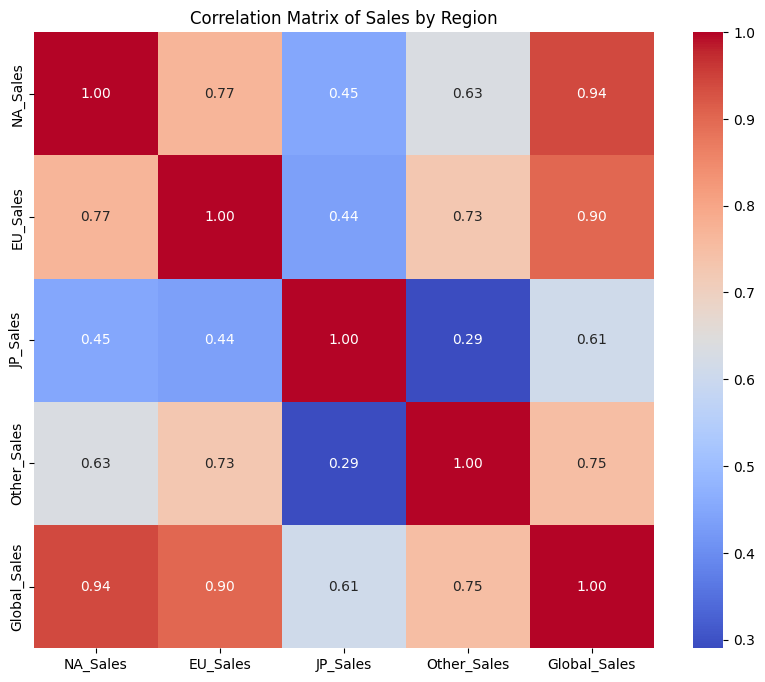

In [ ]:
# Calculate the correlation matrix
correlation_matrix = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Sales by Region')
plt.show()

The heatmap is a visual representation of the correlation matrix, illustrating the strength and direction of the relationship between the regional sales and global sales of video games. Each cell in the heatmap corresponds to a correlation coefficient between two variables, with the scale ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation.

From the heatmap, we observe strong positive correlations between 'Global_Sales' and each of the regional sales ('NA_Sales', 'EU_Sales', 'JP_Sales', and 'Other_Sales'). This suggests that success in individual regions is closely tied to global success. The particularly strong correlation between 'Global_Sales' and 'NA_Sales', as well as 'EU_Sales', implies that these regions may be significant contributors to the overall global sales. The lighter shades in the case of 'JP_Sales' indicate that the Japanese market might not align as closely with global trends compared to North America and Europe.

# **Regression Analysis**
Introduction: Regression analysis estimates relationships among variables, often to make predictions.

Why it's being used: To predict global sales based on regional sales figures, and to understand the impact of regional sales on global success.

Insights: It could quantify how well regional sales can predict global sales, potentially aiding in market analysis and forecasting.

In [ ]:
# Importing necessary library for regression analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Preparing the data for regression analysis
X = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] # Independent variables
y = data['Global_Sales'] # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model and fit it to the training data
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting on the test set
y_pred = regressor.predict(X_test)

# Calculating R^2 score
r2 = r2_score(y_test, y_pred)

# Output the R^2 score
r2

0.9999934776126175

The regression analysis is depicted through the code output, showing an R² score. The R² score represents the proportion of variance in the dependent variable ('Global_Sales') that is predictable from the independent variables ('NA_Sales', 'EU_Sales', 'JP_Sales', and 'Other_Sales'). An R² score close to 1 suggests that the model can explain a large proportion of the variance in global sales based on regional sales figures.

The high R² value obtained from the regression analysis indicates a strong fit of the model to the data, suggesting that regional sales figures can be powerful predictors of global sales. This insight could be particularly useful for forecasting future sales performance based on known regional sales data. The regression model's ability to predict global sales from regional data demonstrates the interconnected nature of the video game market, where regional sales collectively have a significant impact on global figures.

# **Time-Series Analysis**

Time-Series Analysis is a statistical technique that deals with time series data, or trend analysis.
Time series data means that data is in a series of particular time periods or intervals.
The data is considered in three types: Time series data: A set of observations on the values that a variable takes at different times.
Cross-sectional data: Data of one or more variables, collected at the same point in time.
Pooled data: A combination of time series data and cross-sectional data.

In this analysis, we will investigate the total global sales of video games over time.
By analyzing this time series data, we can understand the trend of video game sales,
identify any patterns or seasonal effects, and make forecasts for future sales.
This insight can be particularly valuable to video game producers, marketers, and investors
interested in the performance of the industry over time.

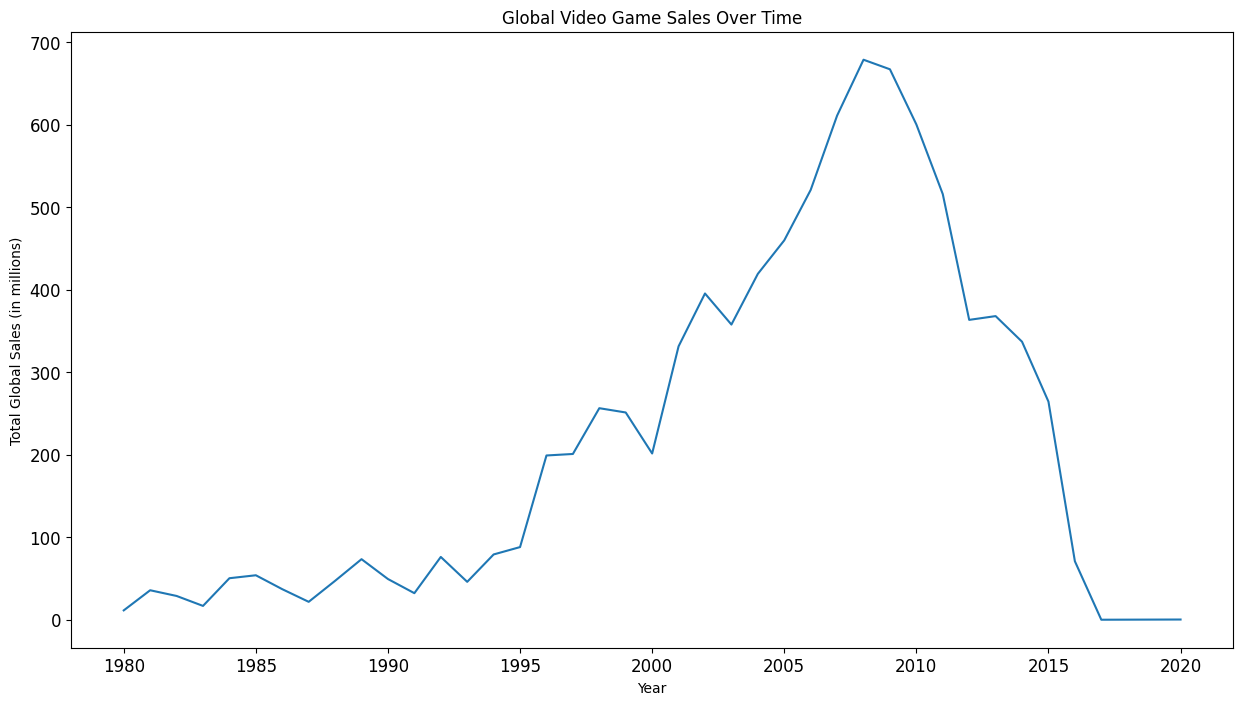

In [ ]:
# Aggregate the data by year and sum up the global sales.
# This groups the dataset by 'Year' and then calculates the sum of 'Global_Sales' for each year.
time_series_data = data.groupby('Year')['Global_Sales'].sum()

# Plotting the time series data.
# Set the size of the plot to be displayed.
plt.figure(figsize=(15, 8))
# Plot the aggregated data as a line chart with a title and font size for the axes' tick labels.
time_series_data.plot(title='Global Video Game Sales Over Time', fontsize=12)
# Set the label for the x-axis.
plt.xlabel('Year')
# Set the label for the y-axis, assuming the sales are in millions.
plt.ylabel('Total Global Sales (in millions)')
# Display the plot.
plt.show()


**The key features and insights that can be observed from the graph:**

**Growth Trend:** Starting from the early 1980s, there is a general upward trend in sales, showing the increasing popularity and market expansion of video games.

**Sales Peak:** There is a distinct peak in sales around the late 2000s, suggesting a period of particularly high consumer spending on video games. This could correspond to a successful generation of gaming consoles, hit games, or broader economic factors.

**Sharp Decline:** After the peak, there is a sharp decline in sales. Without additional context, it's hard to determine the cause, but it could be due to market saturation, a shift to digital downloads (if they're not included in these figures), or economic downturns.

**Sales Plateau:** Post-2015, the graph shows a plateau at a lower level of sales compared to the peak years. This new level could represent a new normal for the industry, possibly stabilized by digital sales, subscription models, or other industry shifts.
